Pode fazer download do notebook do desafio e da pasta `ratas` e trabalhar no seu notebook favorito (Deepnote, Colab, Jupyter Notebook...)

Entregue sua solução em formato notebook (.ipynb), com seu nome no começo (por exemplo: `DiegoLaplagne_Desafio04_NumPy.ipynb`)



## Desafio 4: Edição de vídeo com NumPy
As imagens 'ratas0001.png', 'ratas0002.png', ... contém frames de um vídeo de comportamento de ratos. As imagens são coloridas (RGB), portanto cada uma pode ser representada por um array de 3 dimensões, onde a terceira tem longitude 3.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

1. Carregue uma das imagens (`plt.imread()`) e confira que a variável criada é um ndarray. Quantas dimensões tem o array? Qual o tamanho de cada dimensão?  
Use a função `plt.imshow()` para visualizar o array como imagem.

In [ ]:
uma_imagem = plt.imread('ratas/ratas0001.png')

print(type(uma_imagem), np.shape(uma_imagem))

<class 'numpy.ndarray'> (862, 988, 3)


2. Carregue as imagens **5 a 24** em um ndarray de **4 dimensões**.  
Um jeito possível é:
- Crie primeiro um ndarray de zeros (`np.zeros()`) com as dimensões finais esperadas (quais seriam?) e chame esse array de `video`.
- Programe um loop que carregue cada imagem (`plt.imread()`) e coloque ela no lugar certo do array `video`.  
***
Para conseguir gerar os nomes das imagens a serem carregadas, vão precisar usar algum método para formatar números em strings e fazer 'zero padding'. Tem varios jeitos de fazer isso. Eu gosto de f'{}' ("F Strings")  
https://pythonacademy.com.br/blog/f-strings-no-python#utilizando-formatadores-especiais

In [ ]:
x = 30
lista = []

for i in range(x):
    if i < 9:
        lista.append(f"ratas/ratas000{i+1}.png")
    else:
        lista.append(f"ratas/ratas00{i+1}.png")

lista = lista[4:24]
lista

['ratas/ratas0005.png',
 'ratas/ratas0006.png',
 'ratas/ratas0007.png',
 'ratas/ratas0008.png',
 'ratas/ratas0009.png',
 'ratas/ratas0010.png',
 'ratas/ratas0011.png',
 'ratas/ratas0012.png',
 'ratas/ratas0013.png',
 'ratas/ratas0014.png',
 'ratas/ratas0015.png',
 'ratas/ratas0016.png',
 'ratas/ratas0017.png',
 'ratas/ratas0018.png',
 'ratas/ratas0019.png',
 'ratas/ratas0020.png',
 'ratas/ratas0021.png',
 'ratas/ratas0022.png',
 'ratas/ratas0023.png',
 'ratas/ratas0024.png']

In [ ]:
video = []

In [ ]:
for i in lista:
    imgs = plt.imread(i)
    video.append(imgs)

In [ ]:
print(video)

[array([[[0.9411765, 0.9411765, 0.9411765],
        [0.9411765, 0.9411765, 0.9411765],
        [0.9411765, 0.9411765, 0.9411765],
        ...,
        [0.9411765, 0.9411765, 0.9411765],
        [0.9411765, 0.9411765, 0.9411765],
        [0.9411765, 0.9411765, 0.9411765]],

       [[0.9411765, 0.9411765, 0.9411765],
        [0.9411765, 0.9411765, 0.9411765],
        [0.9411765, 0.9411765, 0.9411765],
        ...,
        [0.9411765, 0.9411765, 0.9411765],
        [0.9411765, 0.9411765, 0.9411765],
        [0.9411765, 0.9411765, 0.9411765]],

       [[0.9411765, 0.9411765, 0.9411765],
        [0.9411765, 0.9411765, 0.9411765],
        [0.9411765, 0.9411765, 0.9411765],
        ...,
        [0.9411765, 0.9411765, 0.9411765],
        [0.9411765, 0.9411765, 0.9411765],
        [0.9411765, 0.9411765, 0.9411765]],

       ...,

       [[0.9411765, 0.9411765, 0.9411765],
        [0.9411765, 0.9411765, 0.9411765],
        [0.9411765, 0.9411765, 0.9411765],
        ...,
        [0.9411765, 0.941

## Abajo el Loop!
> A partir daqui não pode usar mais loops. Tem Universal Functions para todas suas necesidades.
Cada loop perde um ponto na nota!

Podem ir conferindo que as imagens vão ficando do jeito desejado usando, por exemplo, `plt.imshow()`

2. A partir do array `video`, crie um "view" chamado `videito` incluindo só o canto das imagens onde tem os ratos.

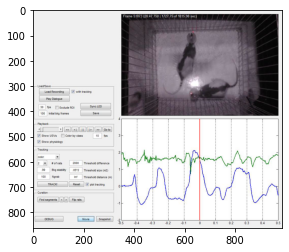

In [ ]:
plt.imshow(video[1])

In [ ]:
np.shape(video)

(20, 862, 988, 3)

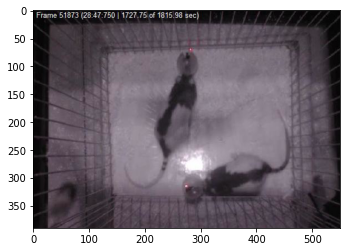

In [ ]:
img1 = video[1]
cut = img1[15:405, 350:900, 0:3]
plt.imshow(cut)

In [ ]:
def cutting(img):
    img_cut = img[15:405, 350:900, 0:3]
    return img_cut

videolito = np.array(list(map(cutting, video)))

3. Crie um novo array chamado `videito_gray` com a versão em tons de cinza de `videito`. Cada frame da nova versão será a media das camadas R, G e B de cada frame original (`np.mean()`).

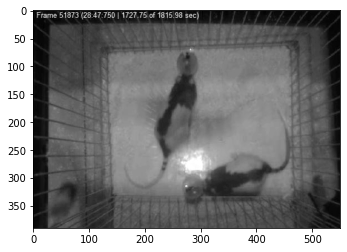

In [ ]:
test_gray = videolito[1][:, :, 0]

plt.imshow(test_gray, cmap="gray")

In [ ]:
np.shape(videolito)

(20, 390, 550, 3)

In [ ]:
def To_Gray(img):
    img_gray = img[:, :, 0]
    return img_gray

videito_gray = np.array(list(map(To_Gray, videolito)))

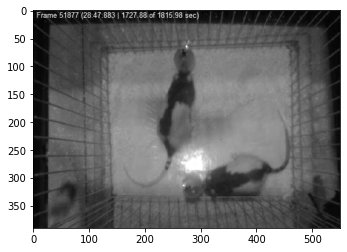

In [ ]:
plt.imshow(videito_gray[5], cmap="gray")

4. Copie o `videito_gray` para um novo nd array chamado `videito_claro` (`.copy()`). Multiplique todos os valores de videito_claro por 2 e, na sequencia, subtitua todos os valores maiores do que 1 pelo valor 1 (um jeito é lembrar de boolean masks). Desse jeito você aumentou a luminosidade do vídeo.  

In [ ]:
videito_claro = np.copy(videito_gray)

def Calcs(img):
    new_img = img*2
    new_img[new_img>1] = 1
    return new_img
    
videito_claro = np.array(list(map(Calcs, videito_claro)))

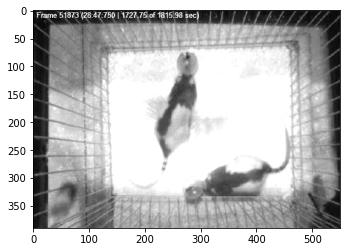

In [ ]:
plt.imshow(videito_claro[1], cmap="gray")

5. Completamente opcional: exporte um arquivo de video a partir do array `videito_gray`. Vai ter que pesquisar na net com quais modules para python pode criar arquivos de video. Boa sorte!
(OK PODE USAR UM LOOP!)

In [ ]:
import os

os.mkdir('new_imgs_ratas')

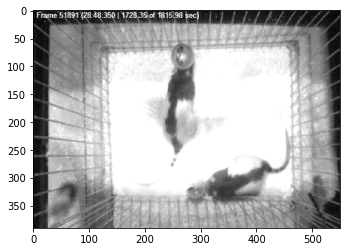

In [ ]:
for i in range(20):
  plt.imshow(videito_claro[i], cmap="gray")
  plt.savefig(f"new_imgs_ratas/rata{i}")

In [ ]:
import cv2

In [ ]:
path = 'new_imgs_ratas/'
out_video_name = 'video.mp4'
out_video_full_path = path+out_video_name

pre_imgs = os.listdir(path)
print(pre_imgs)

['rata13.png', 'rata12.png', 'rata14.png', 'rata16.png', 'rata10.png', 'rata15.png', 'rata3.png', 'rata18.png', 'rata0.png', 'rata5.png', 'rata4.png', 'rata9.png', 'rata17.png', 'rata11.png', 'rata19.png', 'rata8.png', 'rata2.png', 'rata6.png', 'rata7.png', 'rata1.png']


In [ ]:
#pre_imgs.remove('.ipynb_checkpoints')

In [ ]:
img = []
for i in pre_imgs:
  i = path+i
  img.append(i)

print(img)

['new_imgs_ratas/rata13.png', 'new_imgs_ratas/rata12.png', 'new_imgs_ratas/rata14.png', 'new_imgs_ratas/rata16.png', 'new_imgs_ratas/rata10.png', 'new_imgs_ratas/rata15.png', 'new_imgs_ratas/rata3.png', 'new_imgs_ratas/rata18.png', 'new_imgs_ratas/rata0.png', 'new_imgs_ratas/rata5.png', 'new_imgs_ratas/rata4.png', 'new_imgs_ratas/rata9.png', 'new_imgs_ratas/rata17.png', 'new_imgs_ratas/rata11.png', 'new_imgs_ratas/rata19.png', 'new_imgs_ratas/rata8.png', 'new_imgs_ratas/rata2.png', 'new_imgs_ratas/rata6.png', 'new_imgs_ratas/rata7.png', 'new_imgs_ratas/rata1.png']


In [ ]:
cv2_fourcc = cv2.VideoWriter_fourcc(*'mp4v')
frame = cv2.imread(img[0])
size = list(frame.shape)
del size[2]
print(size)
size.reverse()

video = cv2.VideoWriter(out_video_full_path, cv2_fourcc, 24, size)

for i in range(len(img)):
  video.write(cv2.imread(img[i]))

video.release()

[288, 432]
